In [4]:
#Importing important librarys
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
linux_disk1 = pd.read_csv('D:/TON IOT/Processed_datasets/Processed_datasets/Processed_Linux_dataset/linux_disk_1.csv')
linux_disk2 = pd.read_csv('D:/TON IOT/Processed_datasets/Processed_datasets/Processed_Linux_dataset/linux_disk_2.csv')
linux_disk = pd.concat([linux_disk1, linux_disk2])

In [7]:
linux_disk.drop('ts', axis = 1, inplace=True)
linux_disk.drop('type', axis = 1, inplace= True)

linux_disk.head()

,PID,RDDSK,WRDSK,WCANCL,DSK,CMD,label
0,3197,148.2,37340,12328,0.22,firefox,0
1,2327,32824.0,688,4,0.04,init,0
2,2797,23468.0,7416,6152,0.04,nautilus,0
3,2801,3612.0,14320,0,0.02,tracer-store,0
4,2993,5184.0,11152,0,0.02,zeitgeist-fts,0


In [8]:
linux_disk['RDDSK'].isnull().sum()

0

In [9]:
# To see all the unique values
# unique = linux_disk['RDDSK'].unique()

# for values in unique:
#     print(values, end=', ')

# Replacing 'K'(for e.g 150K as 150000) and 'M'(for e.g 56M to 56000000)

In [10]:
linux_disk['RDDSK'].replace('K', '000', regex=True, inplace= True)
linux_disk['RDDSK'].replace('M', '000000', regex=True, inplace= True)

In [11]:
linux_disk['RDDSK']

0           148.2
1         32824.0
2         23468.0
3          3612.0
4          5184.0
           ...   
927356        0.0
927357        0.0
927358        0.0
927359        0.0
927360        0.0
Name: RDDSK, Length: 1927361, dtype: object

In [12]:
# unique = linux_disk['RDDSK'].unique()

# for values in unique:
#     print(values, end=', ')

148.2, 32824.0, 23468.0, 3612.0, 5184.0, 13004.0, 11708.0, 10528.0, 10224.0, 10168.0, 7924.0, 7256.0, 6496.0, 4236.0, 3716.0, 3432.0, 1108.0, 3292.0, 2896.0, 0.0, 2216.0, 1892.0, 1704.0, 1236.0, 1232.0, 876.0, 844.0, 736.0, 724.0, 688.0, 612.0, 604.0, 524.0, 496.0, 404.0, 304.0, 296.0, 292.0, 284.0, 237.0, 212.0, 236.0, 204.0, 184.0, 168.0, 160.0, 144.0, 152.0, 128.0, 72.0, 76.0, 68.0, 64.0, 52.0, 44.0, 36.0, 40.0, 24.0, 20.0, 16.0, 8.0, 4.0, 232.0, 1080.0, 20464.0, 1432.0, 912.0, 2492.0, 364.0, 360.0, 564.0, 120.0, 100.0, 136.0, 96.0, 48.0, 32.0, 196.0, 260.0, 28.0, 20008.0, 1052.0, 840.0, 368.0, 272.0, 60.0, 151.5, 3476.0, 936.0, 808.0, 392.0, 172.0, 12.0, 60836.0, 53228.0, 3844.0, 916.0, 352.0, 316.0, 280.0, 108.0, 88.0, 84.0, 5140.0, 1220.0, 896.0, 708.0, 644.0, 516.0, 488.0, 268.0, 148.0, 112.0, 3840.0, 5900.0, 1524.0, 176.0, 116.0, 80.0, 548.0, 192.0, 92.0, 4504.0, 104.0, 56.0, 1648.0, 1584.0, 1480.0, 492.0, 308.0, 220.0, 140.0, 124.0, 50724.0, 29652.0, 2712.0, 2396.0, 1972.0, 14

In [13]:
# Dealing with very small errors in the dataset
linux_disk.loc[linux_disk['WRDSK']== '49.9 1', 'WRDSK'] = '49.91'
linux_disk.loc[linux_disk['WRDSK']== '-', 'WRDSK'] = '-1'
#Getting rid of the 'K's and 'M's
linux_disk['WRDSK'].replace('K', '000', regex=True, inplace= True)
linux_disk['WRDSK'].replace('M', '000000', regex=True, inplace= True)
linux_disk['WRDSK'] = linux_disk['WRDSK'].astype(float)

linux_disk['RDDSK'] = linux_disk['RDDSK'].astype(float)

#Getting rid of the 'K's and 'M's
linux_disk['WCANCL'].replace('K', '000', regex=True, inplace= True)
linux_disk['WCANCL'].replace('M', '000000', regex=True, inplace= True)
linux_disk['WCANCL'].replace('1%', '0.01', regex=True, inplace= True)
linux_disk['WCANCL'].replace('5%', '0.05', regex=True, inplace= True)
linux_disk['WCANCL'].replace('2%', '0.02', regex=True, inplace= True)
linux_disk['WCANCL'].replace('6%', '0.06', regex=True, inplace= True)
linux_disk['WCANCL'].replace('3%', '0.03', regex=True, inplace= True)
linux_disk['WCANCL'].replace('4%', '0.04', regex=True, inplace= True)
linux_disk['WCANCL'] = linux_disk['WCANCL'].astype(float)

linux_disk['DSK'].replace( ['worer/u256:0', 'atop', 'dhclient', 'apache2','<apache2>', '<dhclient>' ] ,[ '0','0', '0','0', '0','0' ], inplace= True)
linux_disk['DSK'].replace('%', '', regex=True, inplace=True)
linux_disk['DSK'] = linux_disk['DSK'].astype(float)
linux_disk['DSK'].replace([8.0, 5.0, 4.0, 2.0, 26.0, 12.0, 6.0, 29.0, 19.0, 52.0, 11.0, 3.0, 87.0, 66.0, 79.0, 9.0, 13.0, 82.0, 91.0, 93.0, 62.0, 7.0, 88.0, 48.0, 81.0, 84.0, 94.0, 90.0, 92.0, 86.0, 95.0, 96.0, 75.0, 16.0, 54.0, 18.0, 17.0, 25.0, 47.0, 20.0, 60.0, 74.0, 10.0, 24.0, 37.0, 33.0, 23.0, 44.0, 15.0, 43.0, 28.0, 61.0, 59.0, 89.0, 40.0, 21.0, 22.0, 69.0, 97.0, 70.0, 63.0, 83.0, 58.0, 41.0, 45.0, 27.0, 14.0, 78.0, 77.0, 71.0, 39.0, 56.0, 32.0, 98.0, 76.0, 42.0, 57.0, 80.0, 51.0, 73.0, 30.0, 31.0, 50.0, 68.0, 38.0, 46.0, 53.0, 49.0, 72.0, 35.0, 34.0, 36.0, 55.0, 99.0, 67.0, 65.0, 100.0, 85.0, 64.0], [0.08, 0.05, 0.04, 0.02,0.26, 0.12, 0.06, 0.29, 0.19, 0.52, 0.11, 0.03, 0.87, 0.66, 0.79, 0.09, 0.13, 0.82, 0.91, 0.93, 0.62, 0.07, 0.88, 0.48, 0.81, 0.84, 0.94, 0.90, 0.92, 0.86, 0.95, 0.96, 0.75, 0.16, 0.54, 0.18, 0.17, 0.25, 0.47, 0.20, 0.60, 0.74, 0.10, 0.24, 0.37, 0.33, 0.23, 0.44, 0.15, 0.43, 0.28, 0.61, 0.59, 0.89, 0.40, 0.21, 0.22, 0.69, 0.97, 0.70, 0.63, 0.83, 0.58, 0.41, 0.45, 0.27, 0.14, 0.78, 0.77, 0.71, 0.39, 0.56, 0.32, 0.98, 0.76, 0.42, 0.57, 0.80, 0.51, 0.73, 0.30, 0.31, 0.50, 0.68, 0.38, 0.46, 0.53, 0.49, 0.72, 0.35, 0.34, 0.36, 0.55, 0.99, 0.67, 0.65, 1.00, 0.85, 0.64], regex=True, inplace=True)
linux_disk['DSK'] = linux_disk['DSK'].astype(float)

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
linux_disk['CMD'] = le.fit_transform(linux_disk['CMD'])

col:  PID


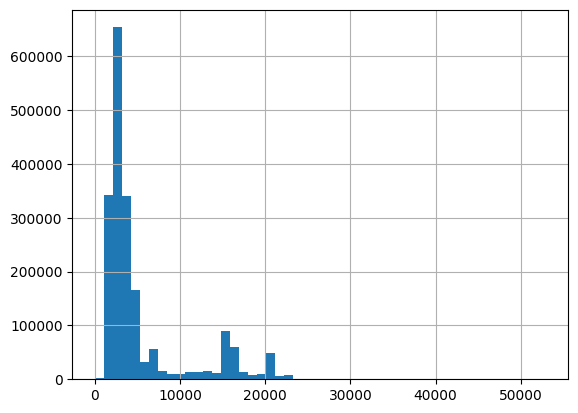

col:  RDDSK


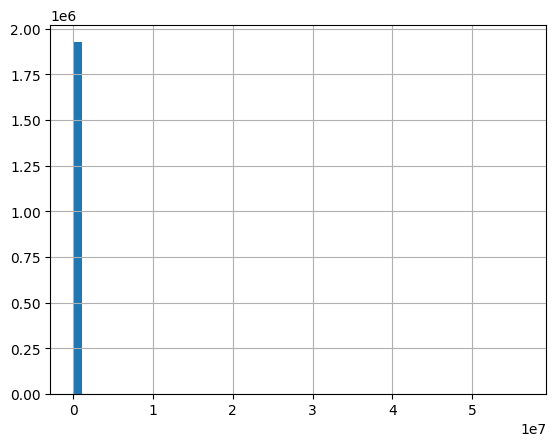

col:  WRDSK


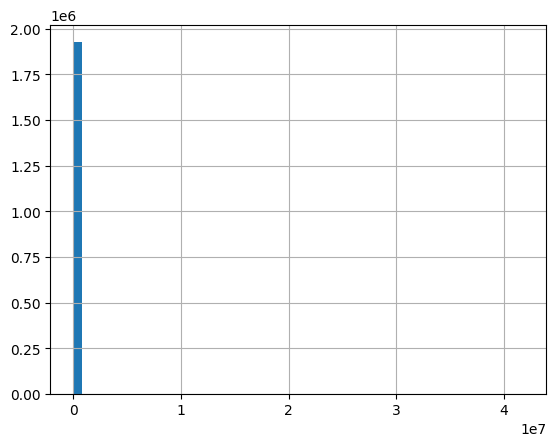

col:  WCANCL


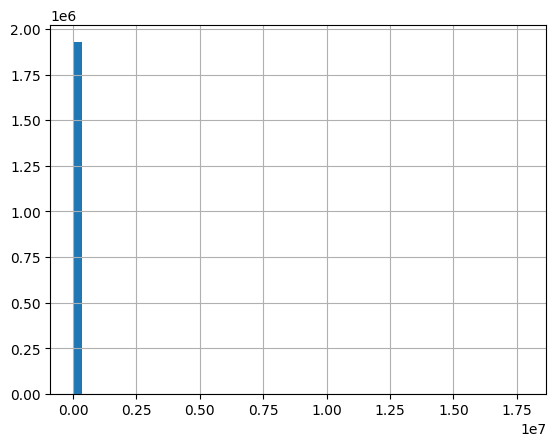

col:  DSK


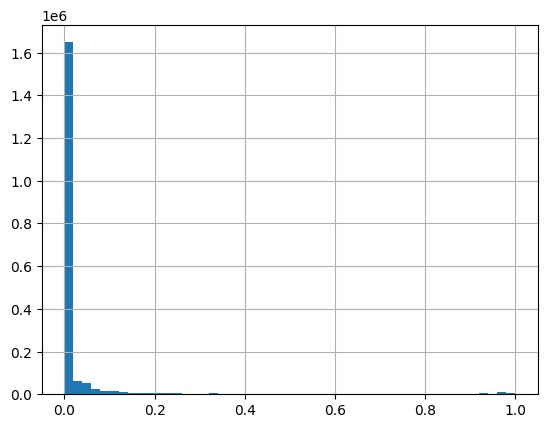

col:  CMD


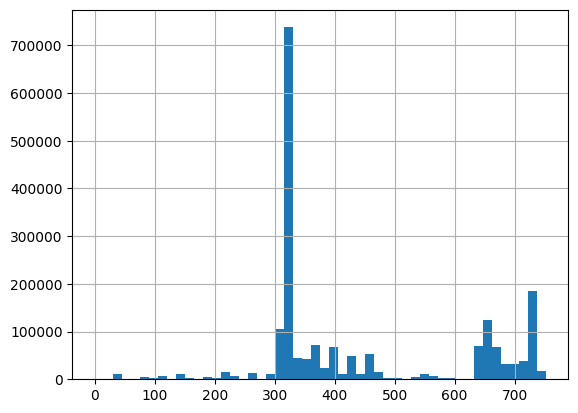

col:  label


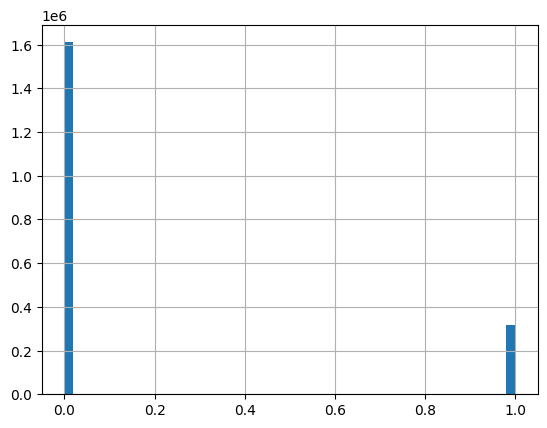

In [15]:
import matplotlib.pyplot as plt
columns = linux_disk.columns
for col in columns:
    print("col: ", col)
    linux_disk[col].hist(bins = 50)
    plt.show()

In [16]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [17]:
x = linux_disk.drop('label', axis = 1)
y = linux_disk['label']

# Without Oversampling

In [18]:
# --------------------------KNN -----------------------------------
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train) #Training the model
y_pred_knn = knn.predict(x_test)
print(y_pred_knn)# printing predictions

#Accuracy Score

from sklearn.metrics import accuracy_score
knnAccuracy = round(accuracy_score(y_test, y_pred_knn)*100,2)
print("Accuracy of KNN: ",knnAccuracy)

#F1 Score

from sklearn.metrics import f1_score
knnF1 = round(f1_score(y_test, y_pred_knn)*100,2)
print("f1_score of KNN: ",knnF1)

#AUC Score

from sklearn.metrics import roc_auc_score
knnAuc = round(roc_auc_score (y_test, y_pred_knn)*100,2)
print('AUC Score of KNN:',knnAuc)

[0 0 0 ... 1 0 1]
Accuracy of KNN:  74.61
f1_score of KNN:  42.23
AUC Score of KNN: 67.33


<AxesSubplot: >

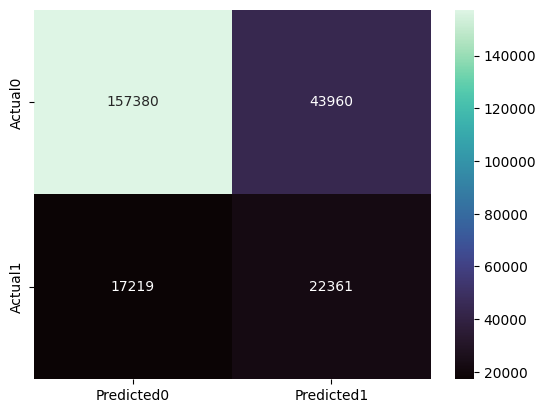

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako' )

plot(y_test, y_pred_knn)

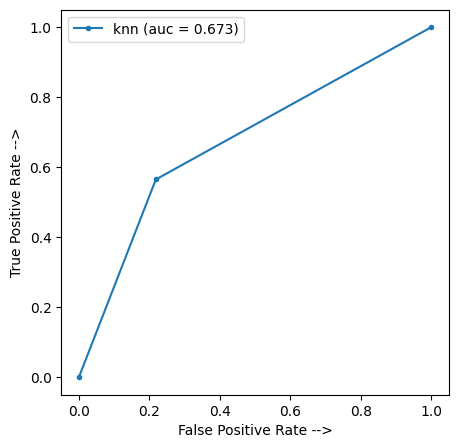

In [20]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

# Oversampling

In [21]:
from imblearn.over_sampling import SMOTE
import numpy as np
#Seeing the value count before oversampling
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
print("Before oversampling",y_train_dict_value_count)

sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

# Seeing the value count after oversampling
unique, count = np.unique(y_train_sm, return_counts = True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
print("After oversampling",y_train_smote_value_count)

Before oversampling {0: 1409384, 1: 277057}
After oversampling {0: 1409384, 1: 1409384}


In [22]:
# --------------------------KNN -----------------------------------
for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]
    
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train) #Training the model
y_pred_knn = knn.predict(x_test)
print(y_pred_knn)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
ovr_knnAccuracy = round(accuracy_score(y_test, y_pred_knn)*100,2)
print("Accuracy of KNN after oversampling:",ovr_knnAccuracy)

#F1 Score

from sklearn.metrics import f1_score
ovr_knnF1 = round(f1_score(y_test, y_pred_knn)*100,2)
print("f1_score of KNN after oversampling:",ovr_knnF1)

#AUC Score

from sklearn.metrics import roc_auc_score
ovr_knnAuc = round(roc_auc_score (y_test, y_pred_knn)*100,2)
print('AUC Score of KNN after oversampling:', ovr_knnAuc)

[0 0 0 ... 0 1 1]
Accuracy of KNN after oversampling: 68.68
f1_score of KNN after oversampling: 65.53
AUC Score of KNN after oversampling: 68.68


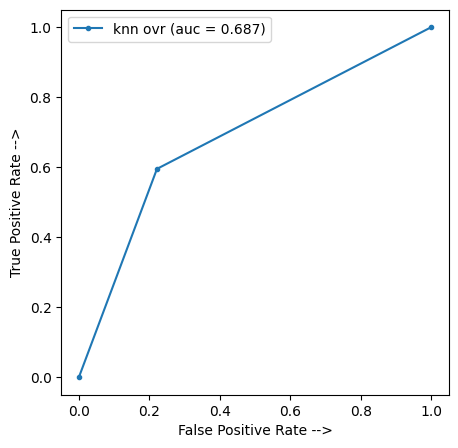

In [23]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn ovr (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

<AxesSubplot: >

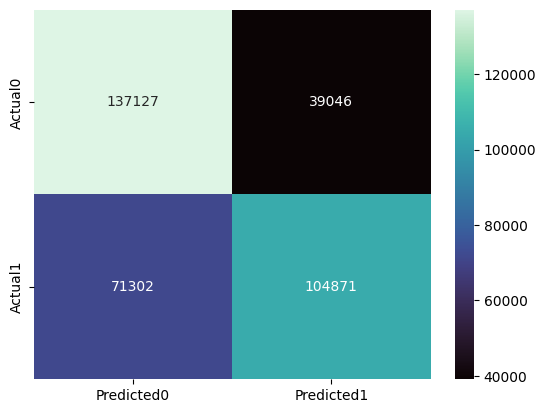

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako' )

plot(y_test, y_pred_knn)

# Undersampling

In [25]:
for train_index, test_index in skf.split(x,y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from collections import Counter

#Seeing the value count before oversampling
print("Before undersampling", Counter(y_train))

rus = RandomUnderSampler(random_state=12)
x_undsampled, y_undsampled = rus.fit_sample(x_train, y_train)

# Seeing the value count after oversampling
print("After undersampling",Counter(y_undsampled))

Before undersampling Counter({0: 1409384, 1: 277057})
After undersampling Counter({0: 277057, 1: 277057})


In [26]:
for train_index, test_index in skf.split(x_undsampled, y_undsampled):
    x_train, x_test, y_train, y_test = x_undsampled.iloc[train_index], x_undsampled.iloc[test_index], y_undsampled.iloc[train_index], y_undsampled.iloc[test_index]

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train) #Training the model
y_pred_knn = knn.predict(x_test)
print(y_pred_knn)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
und_knnAccuracy = round(accuracy_score(y_test, y_pred_knn)*100,2)
print("Accuracy of KNN undersampled : ",und_knnAccuracy)

#F1 Score

from sklearn.metrics import f1_score
und_knnF1 = round(f1_score(y_test, y_pred_knn)*100,2)
print("f1_score of KNN undersampled: ",und_knnF1)

#AUC Score

from sklearn.metrics import roc_auc_score
try:
  und_knnAuc = round(roc_auc_score (y_test, y_pred_knn)*100,2)
  print('AUC Score of KNN undersampled:', und_knnAuc)
except ValueError:
    pass



[0 0 0 ... 0 0 1]
Accuracy of KNN undersampled :  59.28
f1_score of KNN undersampled:  34.33
AUC Score of KNN undersampled: 59.28


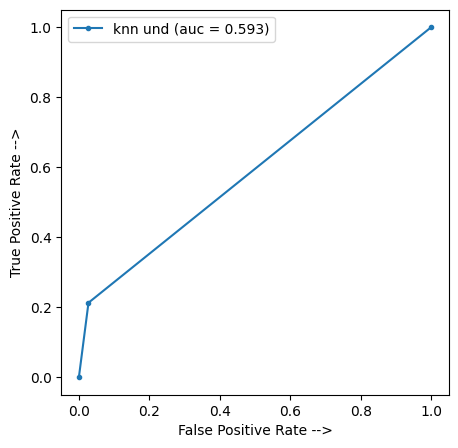

In [27]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn_fpr, knn_tpr, marker='.', label='knn und (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

<AxesSubplot: >

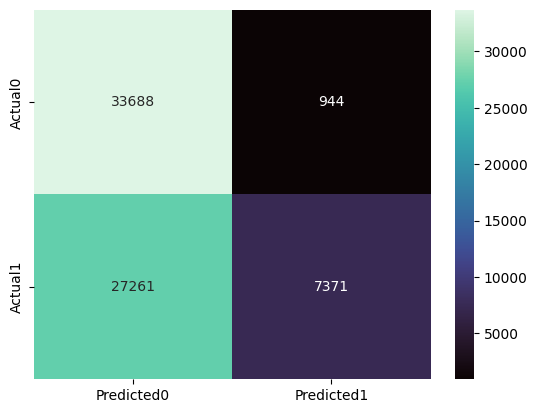

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot(y_true, y_pred):
    labels = unique_labels(y_test)
    column = [f'Predicted{label}' for label in labels]
    indices = [f'Actual{label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), columns = column, index=indices)
    return sns.heatmap(table, annot = True, fmt = 'd', cmap = 'mako' )

plot(y_test, y_pred_knn)

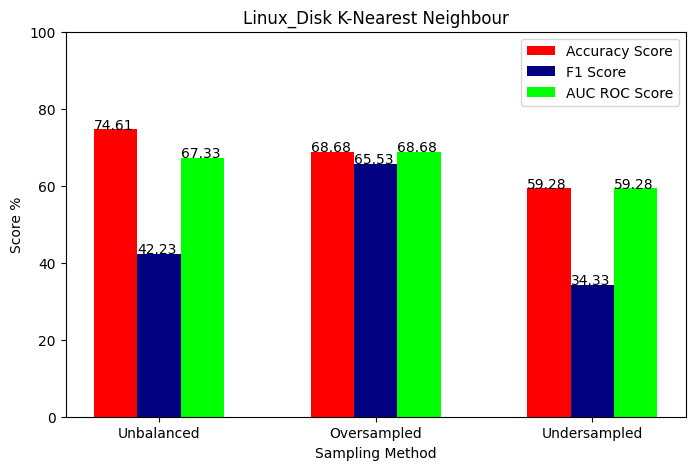

In [30]:
#Plotting a bar graph to compare the accuracy scores of the different scoring metrics
all_accuracy_scores = [knnAccuracy, ovr_knnAccuracy, und_knnAccuracy]
all_f1_scores = [knnF1, ovr_knnF1, und_knnF1]
all_auc_roc_scores = [knnAuc, ovr_knnAuc, und_knnAuc]

x_labels = ['Unbalanced', 'Oversampled', 'Undersampled']

def autolabel(rectangle_group):
    for rect in rectangle_group:
        height = rect.get_height()

        ax.annotate(str(height), xy = (rect.get_x(), height+.15))

width = 0.2

x_all_accuracy_score = [x-width for x in range (len(all_accuracy_scores))]
x_all_f1_score = [x for x in range (len(all_f1_scores))]
x_all_auc_roc_score = [x+width for x in range (len(all_auc_roc_scores))]

fig,ax = plt.subplots(figsize = (8, 5))
rect1 = ax.bar(x_all_accuracy_score ,all_accuracy_scores, width, label='Accuracy Score', color = 'red')
rect2 = ax.bar(x_all_f1_score, all_f1_scores, width, label='F1 Score', color='navy')
rect3 = ax.bar(x_all_auc_roc_score, all_auc_roc_scores, width, label='AUC ROC Score', color='lime')
plt.xticks([x for x in range(len(x_labels))], x_labels)
ax.set_title('Linux_Disk K-Nearest Neighbour')
ax.set_xlabel('Sampling Method')
ax.set_ylabel('Score %')
plt.ylim([0, 100])
ax.legend()

autolabel(rect1)
autolabel(rect2)
autolabel(rect3)
plt.show()